In [1]:
from google.colab import files
iris = files.upload()

Saving iris.csv to iris.csv


In [2]:
drug = files.upload()

Saving drug.csv to drug.csv


In [5]:
import pandas as pd
d1 = pd.read_csv("iris.csv")
df1 = pd.DataFrame(d1)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df1.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df1.columns:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = df1.drop('species', axis=1)
y = df1['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica']))


Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



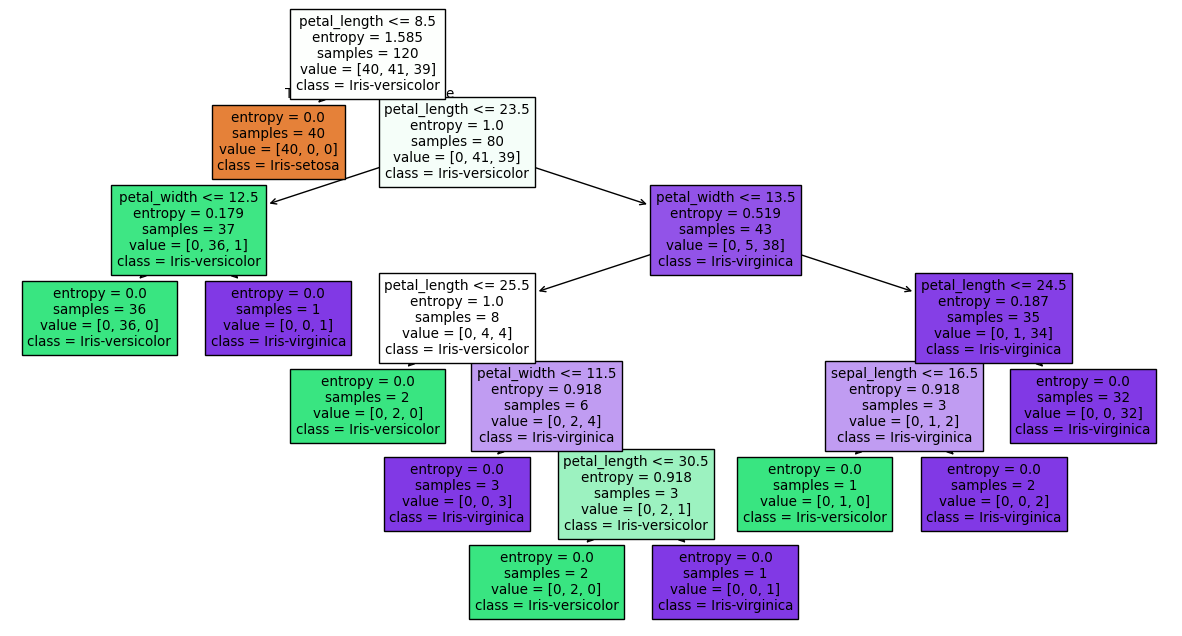

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.show()

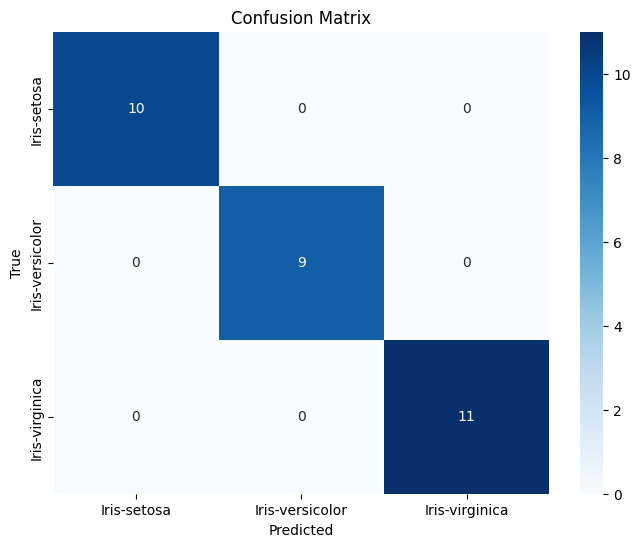

In [25]:


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [40]:
# prompt: 1. For “iris.csv” dataset
# What was the accuracy score for the IRIS dataset?
# What does the confusion matrix tell you about the model's performance? Were there any misclassifications? If so, which
# classes were most confused?

# Accuracy score is already printed in the provided code:
# print(f'Accuracy: {accuracy:.2f}')

# Analyze the confusion matrix:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Interpretation:
# - Diagonal elements represent correctly classified instances.
# - Off-diagonal elements represent misclassifications.

# Check for misclassifications:
misclassified_count = sum([cm[i][j] for i in range(cm.shape[0]) for j in range(cm.shape[1]) if i != j])
if misclassified_count > 0:
  print("\nThere were misclassifications.")

  # Identify the most confused classes:
  # (You can customize this part to find the specific confusion you are interested in.)
  max_off_diagonal = 0
  most_confused_classes = None
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      if i != j and cm[i][j] > max_off_diagonal:
        max_off_diagonal = cm[i][j]
        most_confused_classes = (i, j)

  if most_confused_classes:
    print(f"\nThe classes that were most confused were:\nTrue Class: {most_confused_classes[0]} (likely Iris-versicolor or Iris-virginica based on the order in the code)\nPredicted Class: {most_confused_classes[1]} (likely Iris-versicolor or Iris-virginica based on the order in the code)")
    print(f"Number of misclassifications between these classes: {max_off_diagonal}")
else:
  print("\nNo misclassifications were found.")


Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

No misclassifications were found.


In [26]:
d2 = pd.read_csv("drug.csv")
df2 = pd.DataFrame(d2)
df2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [27]:
df2.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df2.columns:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])
    label_encoders[column] = le
df2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,4
1,30,1,1,0,89,2
2,30,1,1,0,43,2
3,12,0,2,0,10,3
4,44,0,1,0,133,4


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = df2.drop('Drug', axis=1)
y = df2['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



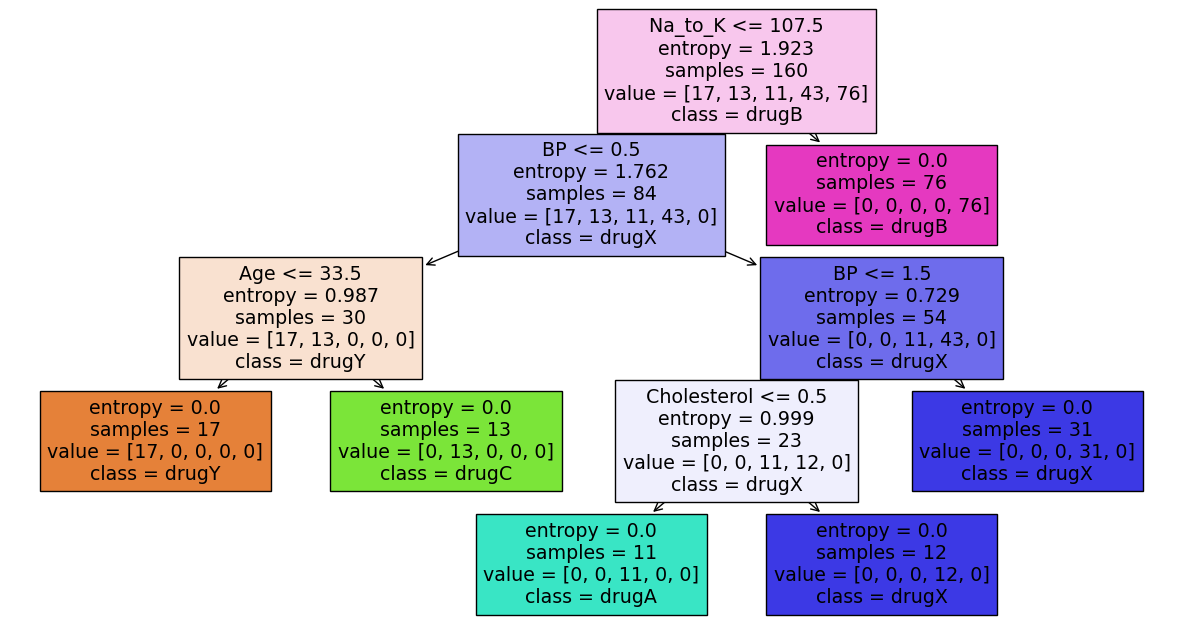

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['drugY', 'drugC','drugA','drugX','drugB'])
plt.show()

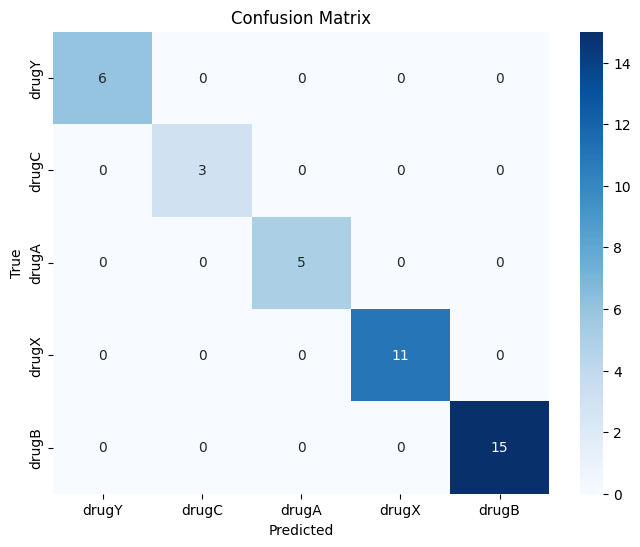

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['drugY', 'drugC','drugA','drugX','drugB'], yticklabels=['drugY', 'drugC','drugA','drugX','drugB'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
petrol = files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


In [42]:
d3 = pd.read_csv("petrol_consumption.csv")
df3 = pd.DataFrame(d3)
df3.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from math import sqrt

X = df3.drop('Petrol_Consumption', axis=1)
y = df3['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f"Root Mean Squared Error: {rms:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 17347.70
Root Mean Squared Error: 131.71
Mean Absolute Error: 94.30
R-squared: -1.59


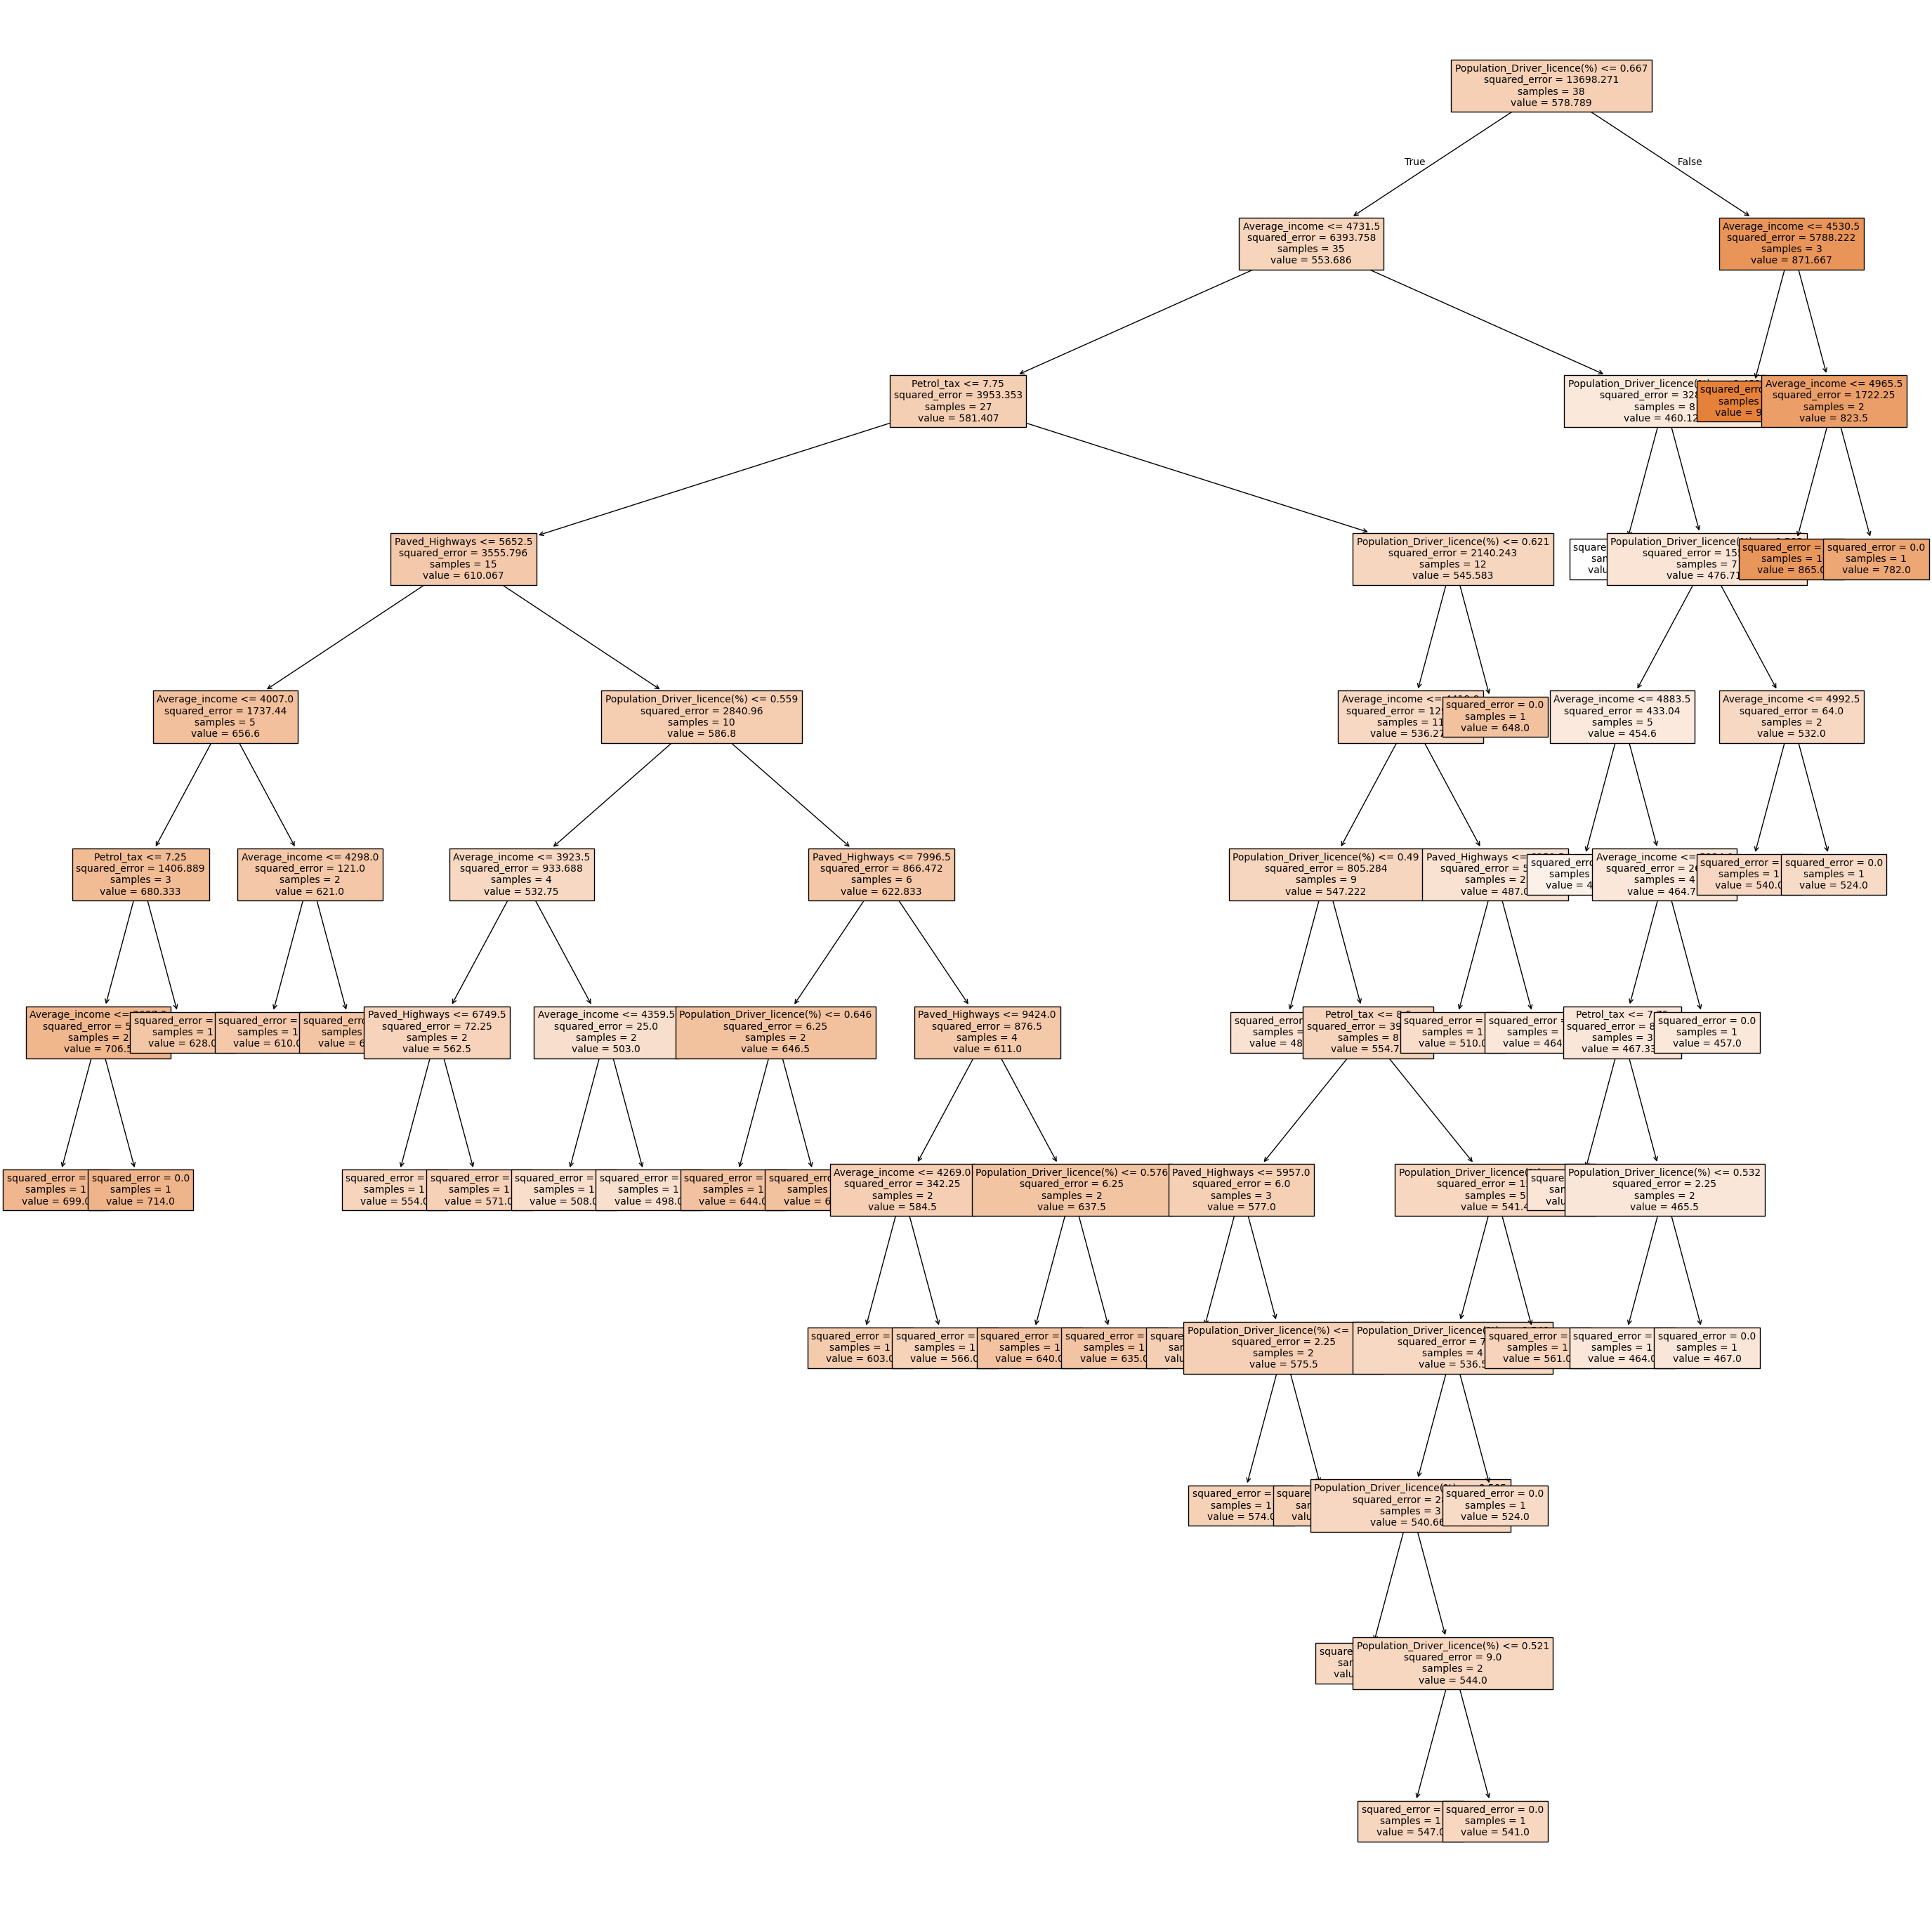

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(35,35))
plot_tree(regressor, filled=True, feature_names=X.columns,fontsize=10)
plt.show()